#MRS Dataset Statistics

##Requirements and Imports

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
!pip install category_encoders
!pip install tabulate
!pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 4.5 MB/s eta 0:00:00


In [4]:
import matplotlib.pyplot as plt
import pandas as pd
from tabulate import tabulate
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from wordcloud import WordCloud
pd.options.mode.chained_assignment = None
from sklearn.preprocessing import MultiLabelBinarizer
import category_encoders as ce
import seaborn as sns
import numpy as np
from scipy.interpolate import CubicSpline

In [5]:
url1 = 'https://media.githubusercontent.com/media/ProbablyItsSpirit/Music_Recommender_System/refs/heads/main/Datasets/artists.csv?token=BCPMKTI3MZMJ2RRKQQNODH3HE4JJW'
url2 = 'https://media.githubusercontent.com/media/ProbablyItsSpirit/Music_Recommender_System/refs/heads/main/Datasets/tracks.csv?token=BCPMKTIHU4YZ632EHWI6CHTHE4JQM'

Importing the files

In [6]:
artists = url1
tracks = url2
df1 = pd.read_csv(artists)
df2 = pd.read_csv(tracks)

##Artist Dataset

###Preprocessing

In [7]:
print("First Row: ")
print(tabulate(df1.head(1), headers=df1.columns, tablefmt='fancy_grid'))

First Row: 
╒════╤════════════════════════╤═════════════╤══════════╤════════════════════════════════════════════════╤══════════════╕
│    │ id                     │   followers │ genres   │ name                                           │   popularity │
╞════╪════════════════════════╪═════════════╪══════════╪════════════════════════════════════════════════╪══════════════╡
│  0 │ 0DheY5irMjBUeLybbCUEZ2 │           0 │ []       │ Armid & Amir Zare Pashai feat. Sara Rouzbehani │            0 │
╘════╧════════════════════════╧═════════════╧══════════╧════════════════════════════════════════════════╧══════════════╛


In [8]:
df1 = df1.drop_duplicates(subset='name')
remaining_duplicates = df1[df1.duplicated(subset='name', keep=False)]
print("Remaining duplicates count:", remaining_duplicates['name'].nunique())
print(remaining_duplicates)

Remaining duplicates count: 0
Empty DataFrame
Columns: [id, followers, genres, name, popularity]
Index: []


In [9]:
df1 = df1.dropna(subset=['name'])
df1 = df1[df1['name'].str.strip() != '']

###Analysis

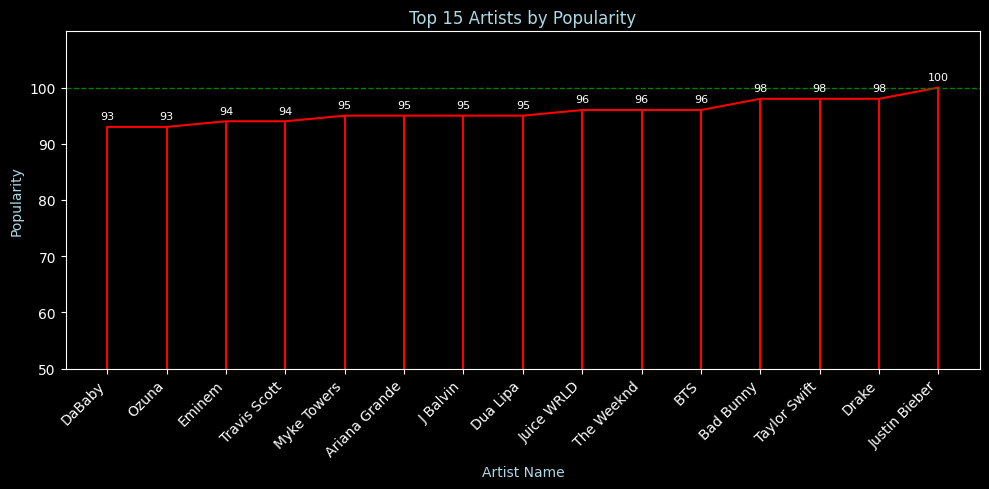

In [10]:
top_artists = df1.nlargest(15, 'popularity').sort_values(by='popularity', ascending=True)

plt.style.use('dark_background')
plt.figure(figsize=(10, 5))
plt.stem(top_artists['name'], top_artists['popularity'], linefmt="red", markerfmt="-", basefmt=" ")
plt.ylim(50, max(top_artists['popularity']) + 10)
plt.axhline(y=100, color='green', linestyle='--', linewidth=1)

plt.xticks(rotation=45, ha='right', fontsize=10, color='white')
plt.xlabel('Artist Name', color='LightBlue')
plt.ylabel('Popularity', color='LightBlue')
plt.title('Top 15 Artists by Popularity', color='LightBlue')

for i, (name, popularity) in enumerate(zip(top_artists['name'], top_artists['popularity'])):
    plt.text(i, popularity + 1, str(popularity), ha='center', va='bottom', fontsize=8, color='white')

#Limit 100?
plt.yticks([50, 60, 70, 80, 90, 100] + list(range(110, max(top_artists['popularity']) + 10, 10)), color='white')

plt.tight_layout()
plt.show()


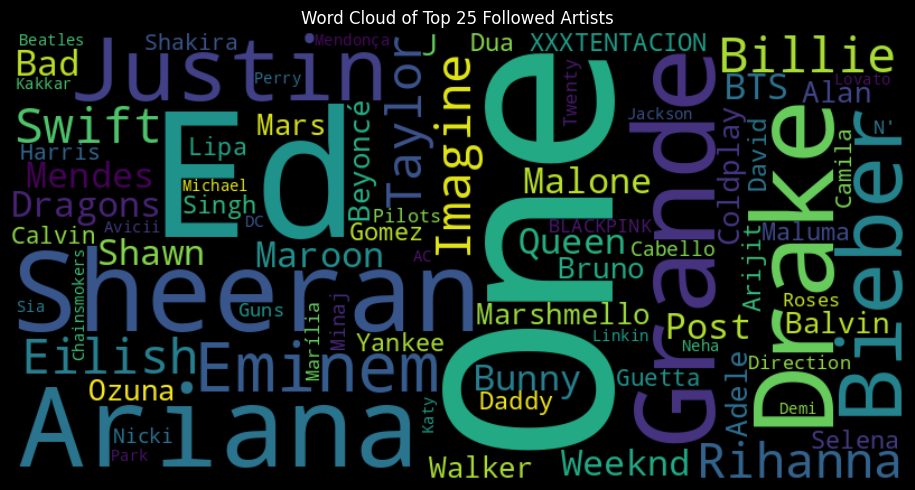

In [11]:
top_followed_artists = df1.nlargest(50, 'followers')
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='viridis').generate(' '.join(top_followed_artists['name'].astype(str)))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Top 25 Followed Artists', color='white')
plt.tight_layout()
plt.show()

##Tracks Dataset

###Preprocessing

In [12]:
print("First Row: ")
print(tabulate(df2.head(1), headers=df2.columns, tablefmt='fancy_grid'))

First Row: 
╒════╤══════════════╤════════════════════════╤════════╤══════════════╤═══════════════╤════════════╤═══════════╤════════════════════════════╤════════════════╤════════════════╤══════════╤═══════╤════════════╤════════╤═══════════════╤════════════════╤════════════════════╤════════════╤═══════════╤═════════╤══════════════════╕
│    │   Unnamed: 0 │ id                     │ name   │   popularity │   duration_ms │   explicit │ artists   │ id_artists                 │ release_date   │   danceability │   energy │   key │   loudness │   mode │   speechiness │   acousticness │   instrumentalness │   liveness │   valence │   tempo │   time_signature │
╞════╪══════════════╪════════════════════════╪════════╪══════════════╪═══════════════╪════════════╪═══════════╪════════════════════════════╪════════════════╪════════════════╪══════════╪═══════╪════════════╪════════╪═══════════════╪════════════════╪════════════════════╪════════════╪═══════════╪═════════╪══════════════════╡
│  0 │          

In [13]:
num_rows = df2.shape[0]
data = [['Number of Songs', num_rows]]
print(tabulate(data, headers='firstrow', tablefmt='rounded_grid'))

╭───────────────────┬──────────╮
│ Number of Songs   │ 534942   │
├───────────────────┼──────────┤
╰───────────────────┴──────────╯


In [14]:
df2['name'] = df2['name'].str.strip().str.lower()

#Based on name and song id
duplicates = df2.duplicated(subset=['id', 'name'], keep=False)
df2 = df2[~duplicates]
df2 = df2.dropna()
df2 = df2[df2['name'].str.strip() != '']

#Based on name and release_date
duplicates = df2[df2.duplicated(subset=['name', 'release_date'], keep=False)]
df2 = df2.drop_duplicates(subset=['name', 'release_date'], keep='first')

#Based on name and duration
duplicates = df2[df2.duplicated(subset=['name', 'duration_ms'], keep=False)]
df2 = df2.drop_duplicates(subset=['name', 'duration_ms'], keep='first')

#Based on name and popularity
duplicates = df2[df2.duplicated(subset=['name', 'popularity'], keep=False)]
df2 = df2.drop_duplicates(subset=['name', 'popularity'], keep='first')

In [15]:
df2 = df2.dropna(subset=['release_date'])
df2 = df2[df2['release_date'].str.strip() != '']

In [16]:
num_rows = df2.shape[0]
data = [['Number of Songs', num_rows]]
print(tabulate(data, headers='firstrow', tablefmt='rounded_grid'))

╭───────────────────┬──────────╮
│ Number of Songs   │ 534941   │
├───────────────────┼──────────┤
╰───────────────────┴──────────╯


**Some publisher with too many songs gotta mask them** (Removed Lines)

In [17]:
#csv download
""" from google.colab import files
df2.to_csv('tracks.csv')
files.download('tracks.csv') """

" from google.colab import files\ndf2.to_csv('tracks.csv')\nfiles.download('tracks.csv') "

Encoding

In [18]:
label_encoder = LabelEncoder()
df2['explicit'] = label_encoder.fit_transform(df2['explicit'])
df2['release_date'] = pd.to_datetime(df2['release_date'], errors='coerce')
df2['release_year'] = df2['release_date'].dt.year
release_year_encoded = pd.get_dummies(df2['release_year'], prefix='year')
df2 = pd.concat([df2, release_year_encoded], axis=1)


In [19]:
key_encoded = pd.get_dummies(df2['key'], prefix='key')
mode_encoded = pd.get_dummies(df2['mode'], prefix='mode')

df2 = pd.concat([df2, key_encoded, mode_encoded], axis=1)


In [20]:
target = 'popularity'

artist_target_encoder = ce.TargetEncoder(cols='artists')
df2['artists_encoded'] = artist_target_encoder.fit_transform(df2['artists'], df2[target])

id_artists_target_encoder = ce.TargetEncoder(cols='id_artists')
df2['id_artists_encoded'] = id_artists_target_encoder.fit_transform(df2['id_artists'], df2[target])

In [21]:
print("DataFrame after encoding:")
print(tabulate(df2.head(1), headers='keys', tablefmt='fancy_grid'))

DataFrame after encoding:
╒════╤══════════════╤════════════════════════╤════════╤══════════════╤═══════════════╤════════════╤═══════════╤════════════════════════════╤═════════════════════╤════════════════╤══════════╤═══════╤════════════╤════════╤═══════════════╤════════════════╤════════════════════╤════════════╤═══════════╤═════════╤══════════════════╤════════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╤═══════════════╤═════

In [22]:
num_rows = df2.shape[0]
data = [['Number of Songs', num_rows]]
print(tabulate(data, headers='firstrow', tablefmt='rounded_grid'))

╭───────────────────┬──────────╮
│ Number of Songs   │ 534941   │
├───────────────────┼──────────┤
╰───────────────────┴──────────╯


###Analysis

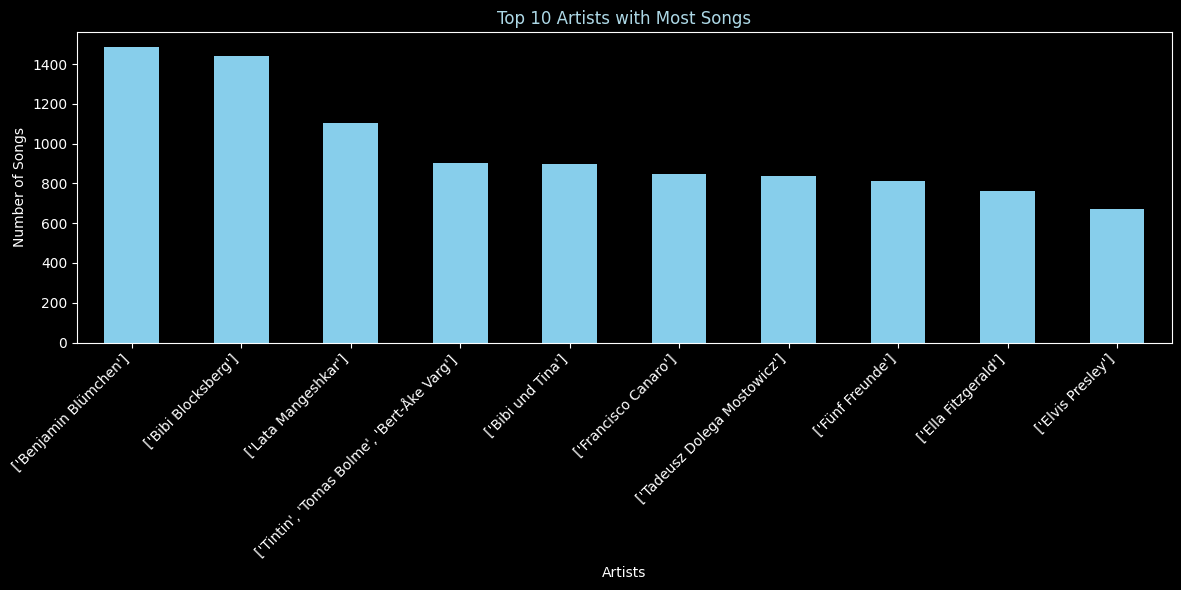

In [23]:
top_artists = df2['artists'].value_counts().head(10)

plt.style.use('dark_background')
plt.figure(figsize=(12, 6))
top_artists.plot(kind='bar', color='skyblue')
plt.xlabel('Artists', color='white')
plt.ylabel('Number of Songs', color='white')
plt.title('Top 10 Artists with Most Songs', color='LightBlue')
plt.xticks(rotation=45, ha='right', color='white')
plt.tight_layout()

plt.show()


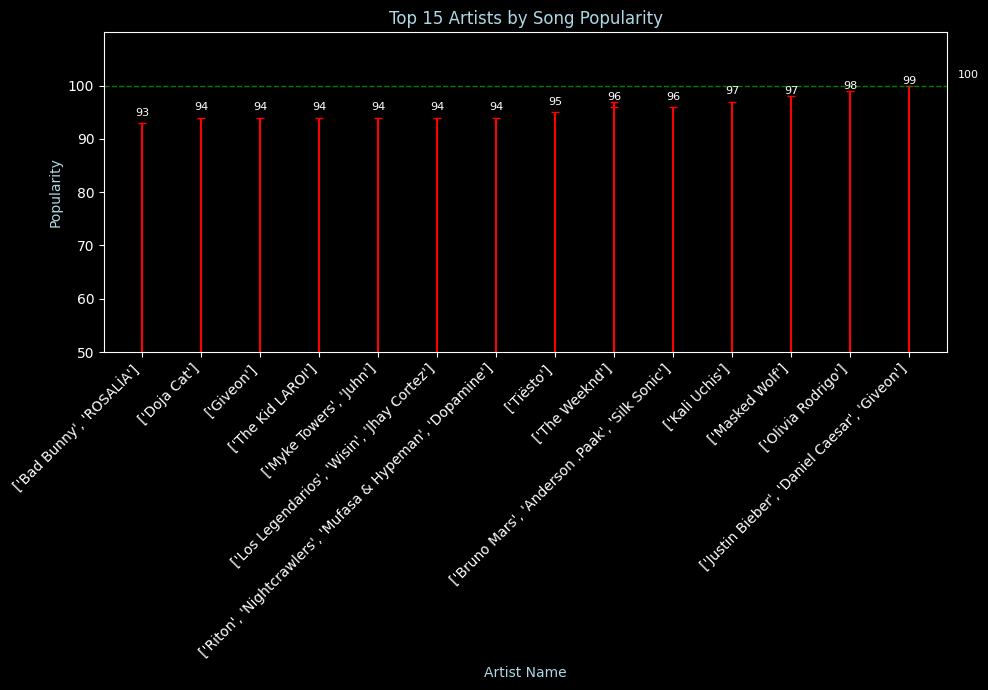

╒════════════════════════════════════════════════════╤════════════════════════════════════════════════════════════╤══════════════╕
│ name                                               │ artists                                                    │   popularity │
╞════════════════════════════════════════════════════╪════════════════════════════════════════════════════════════╪══════════════╡
│ peaches (feat. daniel caesar & giveon)             │ ['Justin Bieber', 'Daniel Caesar', 'Giveon']               │          100 │
├────────────────────────────────────────────────────┼────────────────────────────────────────────────────────────┼──────────────┤
│ drivers license                                    │ ['Olivia Rodrigo']                                         │           99 │
├────────────────────────────────────────────────────┼────────────────────────────────────────────────────────────┼──────────────┤
│ astronaut in the ocean                             │ ['Masked Wolf']             

In [24]:
top_artists = df2.nlargest(15, 'popularity').sort_values(by='popularity', ascending=True)

plt.style.use('dark_background')

plt.figure(figsize=(10, 7))
plt.stem(top_artists['artists'], top_artists['popularity'], linefmt="red", markerfmt="_", basefmt=" ")

plt.ylim(50, max(top_artists['popularity']) + 10)
plt.axhline(y=100, color='green', linestyle='--', linewidth=1)

plt.xticks(rotation=45, ha='right', fontsize=10, color='white')
plt.xlabel('Artist Name', color='LightBlue')
plt.ylabel('Popularity', color='LightBlue')
plt.title('Top 15 Artists by Song Popularity', color='LightBlue')

for i, (name, popularity) in enumerate(zip(top_artists['artists'], top_artists['popularity'])):
    plt.text(i, popularity + 1, str(popularity), ha='center', va='bottom', fontsize=8, color='white')

plt.yticks([50, 60, 70, 80, 90, 100] + list(range(110, max(top_artists['popularity']) + 10, 10)), color='white')

plt.tight_layout()
plt.show()

top_songs = df2[['name', 'artists', 'popularity']].nlargest(15, 'popularity').sort_values(by='popularity', ascending=False)
top_songs.reset_index(drop=True, inplace=True)
print(tabulate(top_songs, headers='keys', tablefmt='fancy_grid', showindex=False))

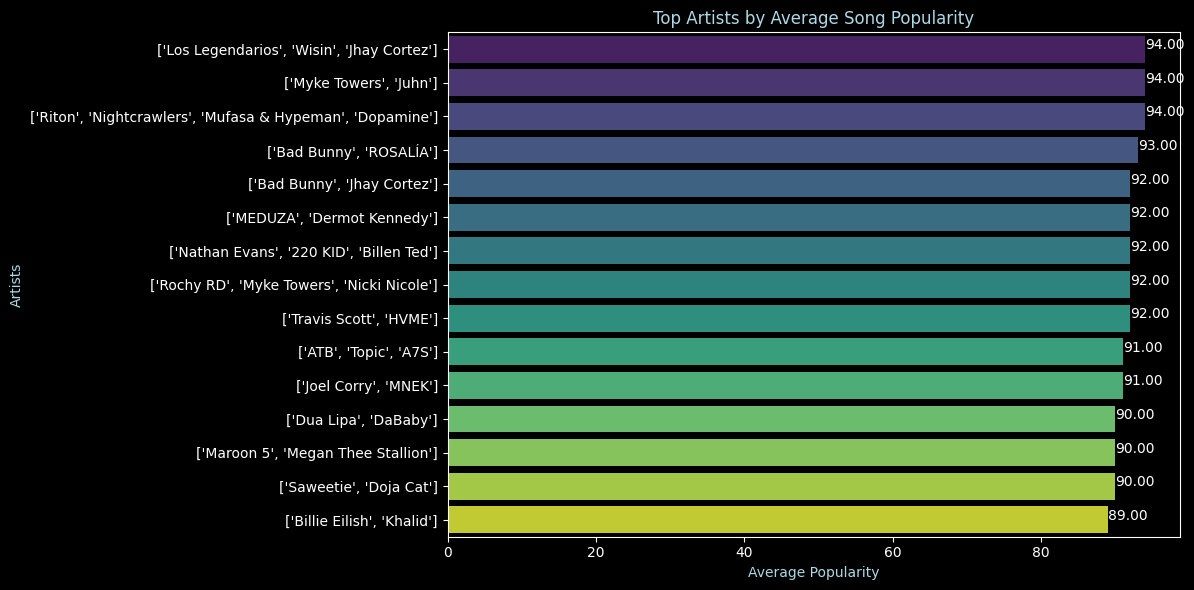

In [25]:
avg_popularity = df2.groupby('artists')['popularity'].mean().nlargest(15)

plt.style.use('dark_background')
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_popularity.values, y=avg_popularity.index, palette='viridis', hue=avg_popularity.index, legend=False)

plt.xlabel('Average Popularity', color='LightBlue')
plt.ylabel('Artists', color='LightBlue')
plt.title('Top Artists by Average Song Popularity', color='LightBlue')

for index, value in enumerate(avg_popularity):
    plt.text(value, index, f'{value:.2f}', color='white')

plt.tight_layout()
plt.show()

In [30]:
import numpy as np

continuous_columns = ['popularity', 'danceability', 'energy', 'tempo', 'loudness',
                      'acousticness', 'instrumentalness', 'liveness', 'valence', 'duration_ms']
attributes = continuous_columns
df2_interpolated = df2.copy()

for col in continuous_columns:
    indices = np.arange(len(df2_interpolated[col]))
    values = df2_interpolated[col].fillna(method='ffill')
    cs = CubicSpline(indices, values)
    df2_interpolated[col] = cs(indices)

df2_interpolated.head()

<ipython-input-30-e9bdbb86877f>:10: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  values = df2_interpolated[col].fillna(method='ffill')


,Unnamed: 0,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,...,key_7,key_8,key_9,key_10,key_11,mode_0,mode_1,artists_encoded,id_artists_encoded,year
0,0,35iwgR4jXetI318WEWsa1Q,carve,6.0,126903.0,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,...,False,False,False,False,False,False,True,22.475624,22.475624,1922.0
1,1,021ht4sdgPcrDgSk7JTbKY,capítulo 2.16 - banquero anarquista,0.0,98200.0,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,...,False,False,False,False,False,False,True,1.317085,1.317085,1922.0
2,2,07A5yehtSnoedViJAZkNnc,vivo para quererte - remasterizado,0.0,181640.0,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,...,False,False,False,False,False,False,True,0.080537,0.080537,1922.0
3,3,08FmqUhxtyLTn6pAh6bk45,el prisionero - remasterizado,0.0,176907.0,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,...,True,False,False,False,False,False,True,0.080537,0.080537,1922.0
4,4,08y9GfoqCWfOGsKdwojr5e,lady of the evening,0.0,163080.0,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],NaT,0.402,...,False,False,False,False,False,True,False,6.914428,6.914428,NaN


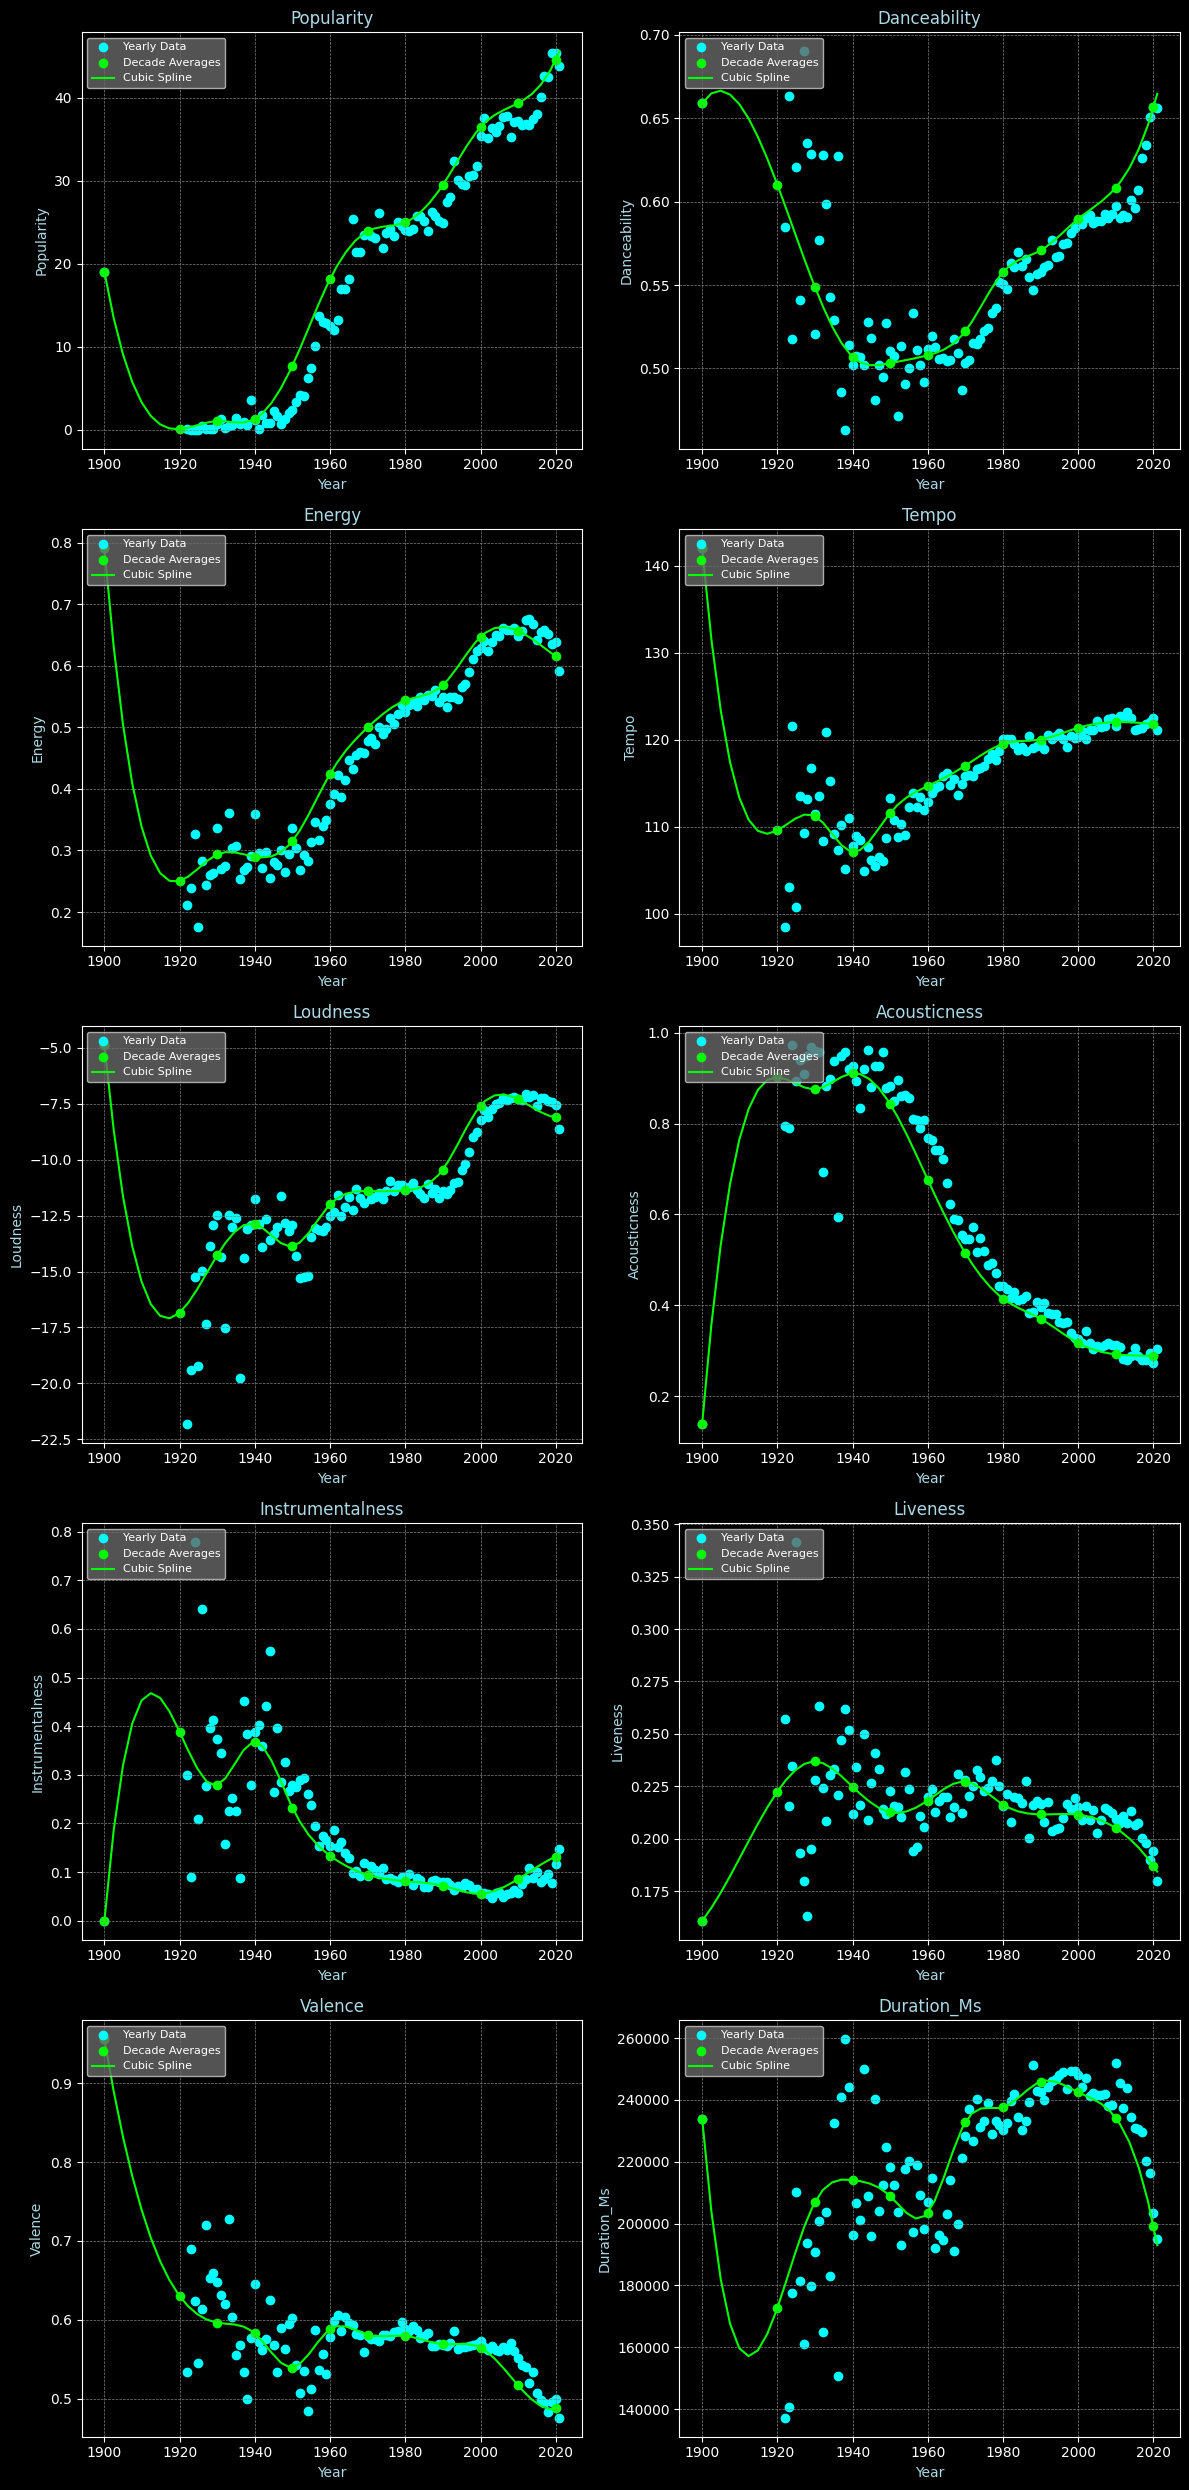

In [31]:
plt.style.use('dark_background')

df2['year'] = pd.to_datetime(df2['release_date'], errors='coerce').dt.year
songs_year = df2.groupby('year')[attributes].mean().dropna()

songs_year['decade'] = (songs_year.index // 10) * 10
songs_decade = songs_year.groupby('decade').mean()

#Req num rows
num_attributes = len(attributes)
num_cols = 2
num_rows = (num_attributes + 1) // num_cols  #+1 to round up

fig, ax = plt.subplots(num_rows, num_cols, figsize=(12, 5 * num_rows))
fig.patch.set_facecolor('black')
counter = 0

for att in attributes:
    row = counter // num_cols
    col = counter % num_cols
    counter += 1

    year = songs_year.index
    decade = songs_decade.index
    data = songs_year[att]
    decade_data = songs_decade[att]

    lin = np.linspace(year.min(), year.max(), 50)
    cs = CubicSpline(decade, decade_data)

    ax[row, col].set_facecolor('black')
    ax[row, col].set_title(att.title(), color='LightBlue')
    ax[row, col].scatter(year, data, color='cyan', label="Yearly Data")
    ax[row, col].scatter(decade, decade_data, color='lime', label="Decade Averages")
    ax[row, col].plot(lin, cs(lin), color='lime', label="Cubic Spline")
    ax[row, col].legend(loc="upper left", fontsize=8, facecolor='dimgray')
    ax[row, col].set_xlabel("Year", color='LightBlue')
    ax[row, col].set_ylabel(att.title(), color='LightBlue')
    ax[row, col].grid(color='gray', linestyle='--', linewidth=0.5)

# Hide unused subplots
for idx in range(counter, num_rows * num_cols):
    fig.delaxes(ax.flatten()[idx])

plt.tight_layout()
plt.show()
